In [1]:
import numpy as np
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.patches as mpatches
from matplotlib import colors

%matplotlib inline

In [2]:
# Main user input section
os.chdir("/Users/x53965mb/Python/Fieldwork/Data") # Sets working directory

# Set how many bins the plot should have
bins=8

# Load and assign data
log1E = pd.read_csv("PB_pci_1E.csv")


In [3]:
# Assign data from spreadsheet
PCI_ddir = np.array(log1E.PCI_ddir)
PCI_dip = log1E.PCI_dip
PCI_type = log1E.Type

In [4]:
# Convert paleo-current-indicators to paleocurrent directions;
#   imbrication: dipdirection +/- 180degrees
#   flute: strike +/- 90 degrees depending on direction
#   PXB: dipdirection
#   TXB: dipdirection

PC_ddir = []

for x in PCI_ddir:
    if x < 180:
        y = x + 180   
        PC_ddir.append(y)
    elif x < 360:
        y = x - 180
        PC_ddir.append(y)
   
PC_ddir = np.where(PCI_ddir < 180, PCI_ddir + 180, PCI_ddir - 180) #converts measurements of imbrication to paleocurrent directions

In [8]:
#Conversion to rose-diagram input

bin_int = 360/bins

bin_classes = []
binn = []
counts = []
counts_perc = []

for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(PC_ddir[(PC_ddir >= (x)*bin_int) & (PC_ddir < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((PC_ddir >= (x)*bin_int) & (PC_ddir < (x+1)*bin_int))) 
    
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts)*100)

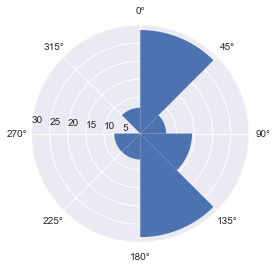

In [9]:
#Plotting non-equal area
#Plotting dataset dependent maximum radius
  
#Calculate the unit radius (r_1%):
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
#Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the binstarting point
width = (2*np.pi)/bins # Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, counts_perc, width=width, bottom=0.0) #Plots non-equal area

ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_rlabel_position(-85)  # Move radial labels away from plotted line

plt.show()

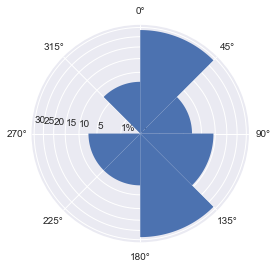

In [10]:
#Plotting with equal area
#Ploting with dataset-dependent radius
    
#Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
#Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

#Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise

ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(-85)  # Move radial labels away from plotted line

plt.show()

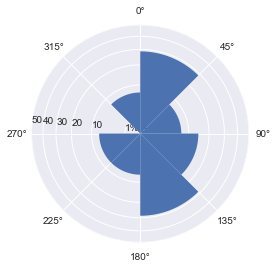

In [11]:
#PLotting with equal area
#Plotting with a fixed radius

radius = 50 #%
    
#Calculate the unit radius (r_1%), depending on input maximum radius:
r_unit = radius/math.sqrt(radius)
#Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

#Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 10 #Sets the spacing between radius ticks
for x in range(0,int(radius)+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the binstarting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise

ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(-85)  # Move radial labels away from plotted line

plt.show()

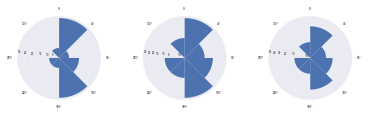

In [12]:
#Try subplots

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the binstarting point
width = (2*np.pi)/bins # Calculates bin width depending on number of bins

ax1 = plt.subplot(131, projection='polar')
ax1.bar(theta, counts_perc, width=width, bottom=0.0) #Plots non-equal area
ax1.set_theta_zero_location("N")  # theta=0 at the top
ax1.set_theta_direction(-1)  # theta increasing clockwise
ax1.set_rlabel_position(-85)  # Move radial labels away from plotted line
ax1.tick_params(axis='both', labelsize=3, pad=0)
ax1.grid(linewidth=0.1)

##############################
#Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
#Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

#Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
ax2 = plt.subplot(132, projection='polar')
ax2.bar(theta, radii, width=width, bottom=0.0) #Plots equal-area
ax2.set_theta_zero_location("N")  # theta=0 at the top
ax2.set_theta_direction(-1)  # theta increasing clockwise
ax2.set_yticks(r_ticks)
ax2.set_yticklabels(r_tickslabels)
ax2.set_rlabel_position(-85)  # Move radial labels away from plotted line
ax2.tick_params(axis='both', labelsize=3, pad=0)
ax2.grid(linewidth=0.1)

#############################
radius = 50 #%
    
#Calculate the unit radius (r_1%), depending on input maximum radius:
r_unit = radius/math.sqrt(radius)
#Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

#Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 10 #Sets the spacing between radius ticks
for x in range(0,int(radius)+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
    
ax3 = plt.subplot(133, projection='polar')
ax3.bar(theta, radii, width=width, bottom=0.0) #Plots equal-area
ax3.set_theta_zero_location("N")  # theta=0 at the top
ax3.set_theta_direction(-1)  # theta increasing clockwise
ax3.set_yticks(r_ticks)
ax3.set_yticklabels(r_tickslabels)
ax3.set_rlabel_position(-85)  # Move radial labels away from plotted line
ax3.tick_params(axis='both', labelsize=3, pad=0)
ax3.grid(linewidth=0.1)

plt.subplots_adjust(wspace = 0.5)
plt.savefig('subplots.svg', bbox_inches='tight')
plt.show()